# Data Clustering Vehicle in a Dealer

## By Ditya Athallah

1301194095

IF-43-INT

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans #only used for elbow method
from scipy.spatial.distance import cdist
import missingno as msno
import math
import random as r
import random
import copy

## Import Data

In [2]:
df_train = pd.read_csv('https://github.com/Dityath/Machine-Learning-First/blob/main/kendaraan_train.csv?raw=true')
df_test = pd.read_csv('https://github.com/Dityath/Machine-Learning-First/blob/main/kendaraan_test.csv?raw=true')

Show the top 5 datas

In [3]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Show the data shape

In [4]:
df_train.shape

(285831, 12)

Show the data information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Show data description

In [6]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Check the null and missing data

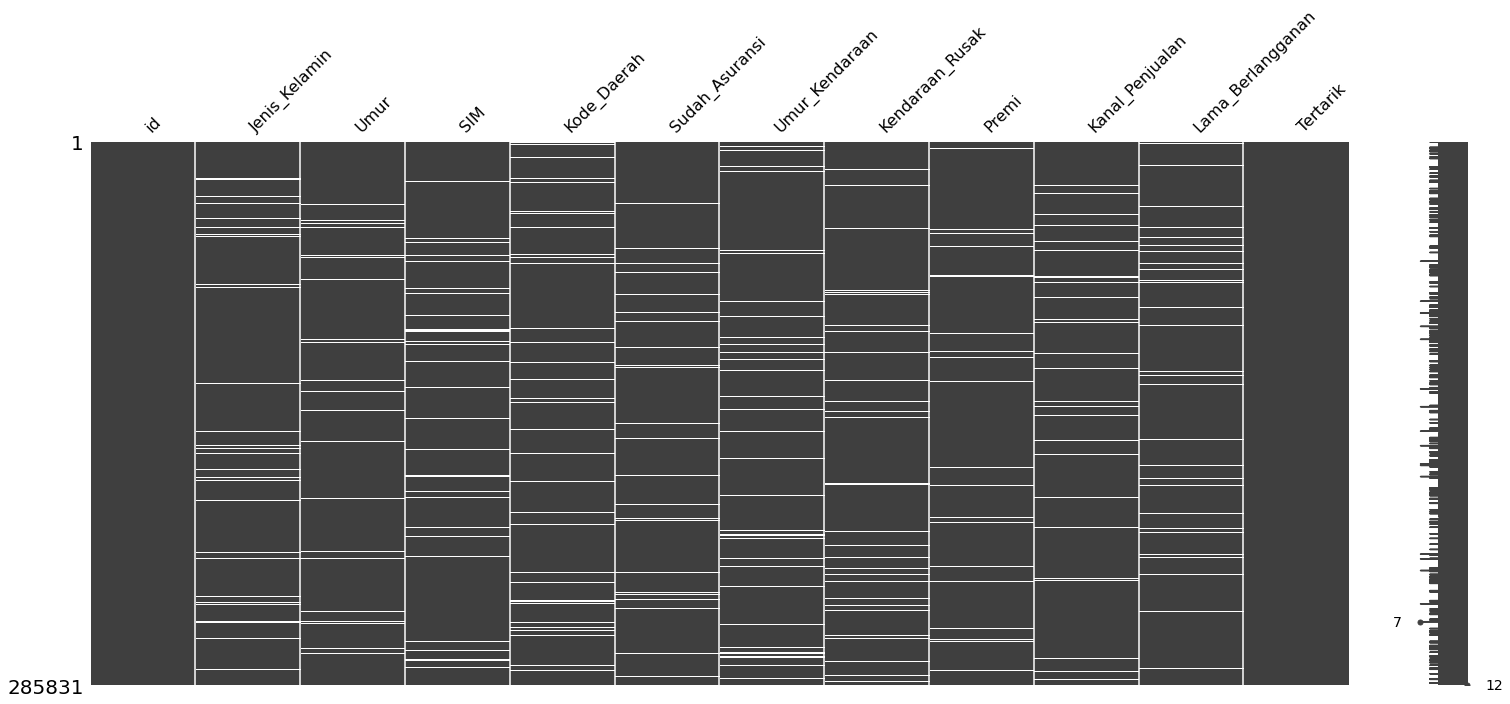

In [7]:
msno.matrix(df_train)

Check null data per column

In [8]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Check if the data had duplicate

In [9]:
df_train.duplicated().sum()

0

## Data Cleansing

In [10]:
df_train.fillna(df_train.mean(), inplace=True) # for numeric data
df_train = df_train.fillna(df_train.mode().iloc[0]) # for string data

df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


Check data again

In [11]:
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## Data Preprocessing

Check data corellation

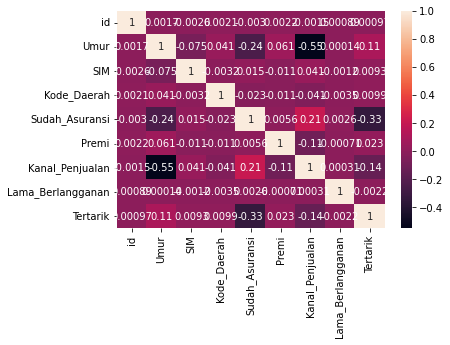

In [12]:
sns.heatmap(df_train.corr(), vmax=1, annot=True)

See the data distribution using histogram

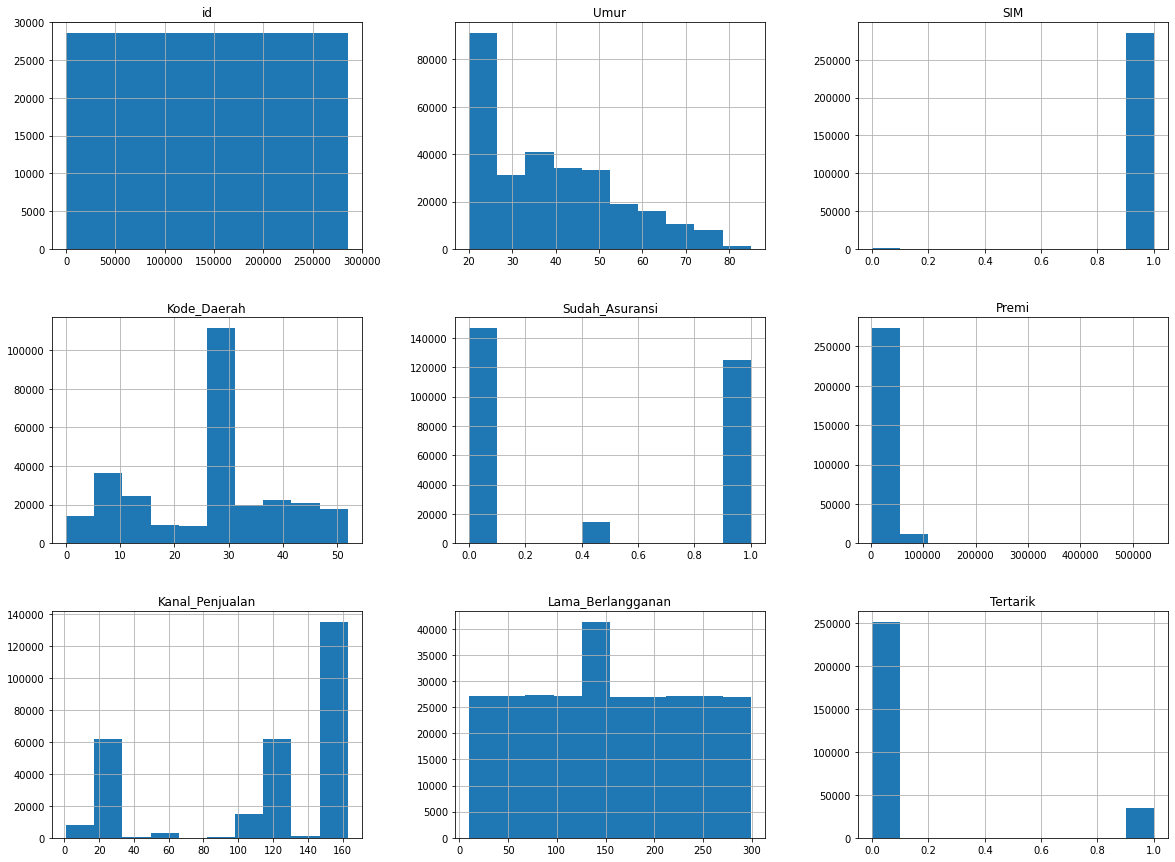

In [13]:
hist = df_train.hist(figsize=(20,15))

Check the data outlier

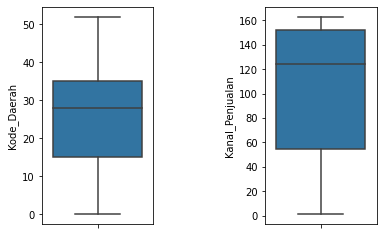

In [14]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_train["Kode_Daerah"], ax=axes[0])
sns.boxplot(y=df_train["Kanal_Penjualan"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Pick 2 attribute for clustering

In [15]:
cols = [1,2,3,4]

cluster = df_train.loc[:,'Kode_Daerah':'Kanal_Penjualan'] #model 1
clusterr = df_train.loc[:,'Kode_Daerah':'Kanal_Penjualan'] #model2

clusterr.drop(clusterr.columns[cols], axis=1, inplace=True)
cluster.drop(cluster.columns[cols], axis=1, inplace=True)
cluster.head()
clusterr.head()

,Kode_Daerah,Kanal_Penjualan
0,33.0,152.0
1,39.0,29.0
2,46.0,160.0
3,48.0,124.0
4,35.0,88.0


## Clustering

Outlier handler

Model 1

In [16]:
while True:
  qlo1, qlo3 = np.percentile(clusterr['Kode_Daerah'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = clusterr[(clusterr['Kode_Daerah'] < (lowerlo)) | (clusterr['Kode_Daerah'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  clusterr.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

clusterr['Kode_Daerah'].describe()

amount of outlier data 0


count    285831.000000
mean         26.405410
std          12.916803
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Kode_Daerah, dtype: float64

Model 2

In [17]:
while True:
  qla1, qla3 = np.percentile(clusterr['Kanal_Penjualan'],[25,75])
  iqrla = qla3 - qla1
  lowerla = qla1 - (1.5 * iqrla)
  upperla = qla3 + (1.5 * iqrla)
  outlierla = clusterr[(clusterr['Kanal_Penjualan'] < (lowerla)) | (clusterr['Kanal_Penjualan'] > (upperla))]
  print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
  idxla = outlierla.index
  clusterr.drop(idxla, inplace=True) #drop outlier data
  if (outlierla.shape[0] <= 0):
    break

clusterr['Kanal_Penjualan'].describe()

amount of outlier data 0


count    285831.000000
mean        112.021567
std          52.829291
min           1.000000
25%          55.000000
50%         124.000000
75%         152.000000
max         163.000000
Name: Kanal_Penjualan, dtype: float64

Check outlier after handle it

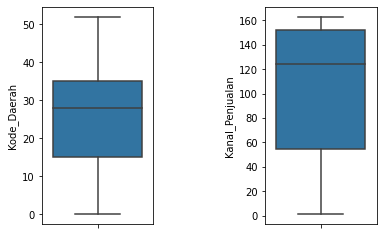

In [18]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=clusterr["Kode_Daerah"], ax=axes[0])
sns.boxplot(y=clusterr["Kanal_Penjualan"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Encode from ordinal type to numerical type

In [20]:
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
clas['Jenis_Kelamin'] = encode.fit_transform(clas['Jenis_Kelamin'])
clas['Umur'] = encode.fit_transform(clas['Umur'])

clas.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah
0,1,10,1.0,33.0
1,0,29,1.0,39.0
2,0,1,1.0,46.0
3,1,39,1.0,48.0
4,0,31,1.0,35.0


Check the outlier after encode

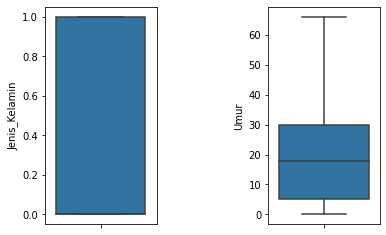

In [21]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=clas['Jenis_Kelamin'], ax=axes[0])
sns.boxplot(y=clas['Umur'], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [22]:
K = range(1,10)
distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(cluster)
    kmeanModel.fit(cluster)
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster.shape[0])

<function matplotlib.pyplot.show>

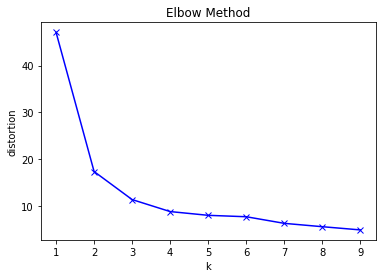

<Figure size 360x360 with 0 Axes>

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow Method')
fig = plt.figure(figsize=(5, 5))
plt.show

evaluation based on SSE

In [24]:
print('k=4',distortions[3])
print('k=5',distortions[4])

k=4 8.79068993314038
k=5 7.989120720009784


Find Centroids

In [25]:
def find_centroids(cluster):
    k = 4
    centroids = {
        i + 1 : [random.choices(cluster['Kode_Daerah']),random.choices(cluster['Kanal_Penjualan'])]
        for i in range(k)
    }
    return centroids

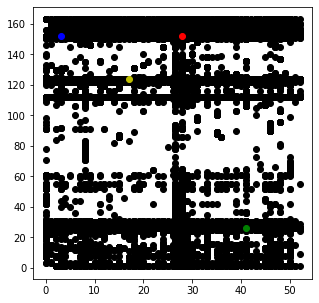

In [26]:
centroids = find_centroids(cluster)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['Kode_Daerah'], cluster['Kanal_Penjualan'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Assignment Stage

In [27]:
def assignment(cluster, centroids):
    for i in centroids.keys():
        cluster['distance_from_{}'.format(i)] = (
            np.sqrt(
                (cluster['Kode_Daerah'] - centroids[i][0]) ** 2
                + (cluster['Kanal_Penjualan'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    cluster['closest'] = cluster.loc[:, centroid_distance_cols].idxmin(axis=1)
    cluster['closest'] = cluster['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    cluster['color'] = cluster['closest'].map(lambda x: colmap[x])
    return cluster

cluster = assignment(cluster, centroids)
cluster.head()

,Kode_Daerah,Kanal_Penjualan,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color
0,33.0,152.0,5.000000,126.253713,30.000000,32.249031,1,r
1,39.0,29.0,123.490890,3.605551,128.160056,97.514102,2,g
2,46.0,160.0,19.697716,134.093251,43.737855,46.227697,1,r
3,48.0,124.0,34.409301,98.249682,53.000000,31.000000,4,y
4,35.0,88.0,64.381674,62.289646,71.554175,40.249224,4,y


plot assignment stage


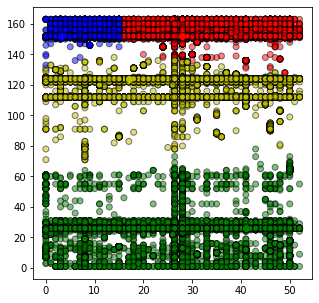

In [28]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['Kode_Daerah'], cluster['Kanal_Penjualan'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Update Centroids

In [29]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(cluster[cluster['closest'] == i]['Kode_Daerah'])
        centroids[i][1] = np.mean(cluster[cluster['closest'] == i]['Kanal_Penjualan'])
    return k

centroids = update(centroids)

Plot result

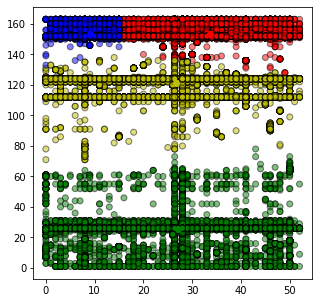

In [30]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster['Kode_Daerah'], cluster['Kanal_Penjualan'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Repeat Assigment Stage

In [31]:
cluster = assignment(cluster, centroids)

Plot results

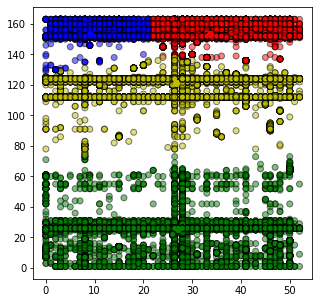

In [32]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['Kode_Daerah'], cluster['Kanal_Penjualan'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Continue until all assigned categories don't change any more

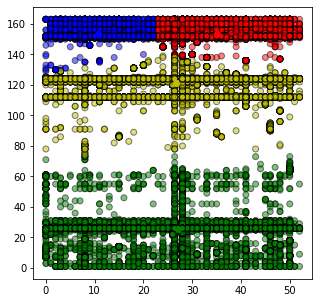

In [33]:
while True:
    closest_centroids = cluster['closest'].copy(deep=True)
    centroids = update(centroids)
    cluster = assignment(cluster, centroids)
    if closest_centroids.equals(cluster['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['Kode_Daerah'], cluster['Kanal_Penjualan'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

Evaluation using elbow method

In [34]:
K = range(1,10)
distortionss = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(clusterr)
    kmeanModel.fit(clusterr)
    distortionss.append(sum(np.min(cdist(clusterr, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / clusterr.shape[0])

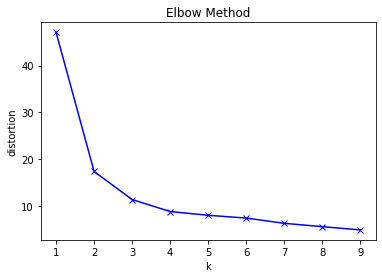

<Figure size 360x360 with 0 Axes>

In [35]:
plt.plot(K, distortionss, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow Method')
fig = plt.figure(figsize=(5, 5))
plt.show()

In [36]:
print('k=4',distortionss[3])
print('k=5',distortionss[4])

k=4 8.79068993314038
k=5 7.989120720009784


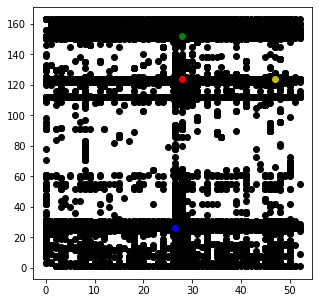

In [37]:
centroidss = find_centroids(clusterr)
fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['Kode_Daerah'], clusterr['Kanal_Penjualan'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
plt.show()

In [38]:
clusterr = assignment(clusterr, centroidss)
clusterr.head()

,Kode_Daerah,Kanal_Penjualan,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color
0,33.0,152.0,28.442925,5.000000,126.172456,31.304952,2,g
1,39.0,29.0,95.634722,123.490890,12.946957,95.336247,3,b
2,46.0,160.0,40.249224,19.697716,135.425064,36.013886,2,g
3,48.0,124.0,20.000000,34.409301,100.351015,1.000000,4,y
4,35.0,88.0,36.674242,64.381674,62.592867,37.947332,1,r


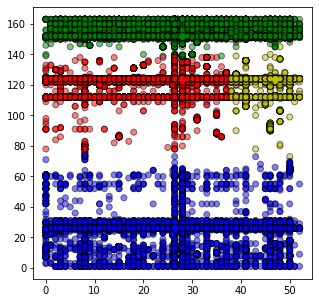

In [39]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['Kode_Daerah'], clusterr['Kanal_Penjualan'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
plt.show()

Update Centroids

In [40]:
centroidss = update(centroidss)

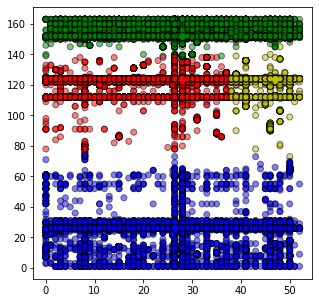

In [41]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(clusterr['Kode_Daerah'], clusterr['Kanal_Penjualan'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
plt.show()

Repeat Assigment Stage

In [42]:
clusterr = assignment(clusterr, centroidss)

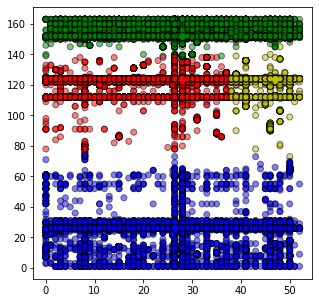

In [43]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['Kode_Daerah'], clusterr['Kanal_Penjualan'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])

plt.show()

Continue until all assigned categories don't change any more

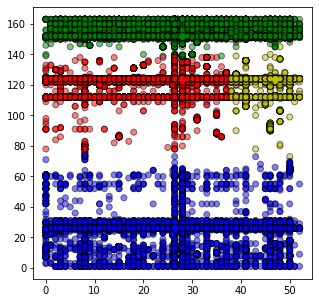

In [44]:
while True:
    closest_centroids = clusterr['closest'].copy(deep=True)
    centroidss = update(centroidss)
    clusterr = assignment(clusterr, centroidss)
    if closest_centroids.equals(clusterr['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(clusterr['Kode_Daerah'], clusterr['Kanal_Penjualan'], color=clusterr['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroidss[i], color=colmap[i])
plt.show()